# OscillAI: Simulating Neutrino Oscillation Maps using AI

## Installation

Execute `!pip install git+https://github.com/GiorgioMorales/OscillationMaps` in the terminal.


In [1]:
!pip install -q git+https://github.com/GiorgioMorales/OscillationMaps

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 123.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 87.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.2/346.2 kB 30.2 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


## Oscillation Maps after matter effect

OscillAI uses the class `MatterEffect` to produce the 9 oscillation maps estimating matter effect.
By initializing this class, we're loading and prepping the saved trained models and model statistics.

To get the actual maps given a set of oscillation parameters, we call the `get_maps` method:

**Parameters** (for now):

*   `osc_pars`: Batches of oscillation parameters in order: `[theta12, theta23, theta13, delta_cp, m21, m31]`

In [2]:
import numpy as np
from OscillationMaps.MatterEffect import MatterEffect
propagator = MatterEffect()

# Define 7 sets of parameters
osc_pars_in = np.array([[2.392e+02,  2.955e+02,  2.183e+02,  2.128e+02,  6.523e-05, -5.502e-03],
                           [2.0650e+02,  2.6060e+02,  1.1860e+02,  2.8160e+01,  6.7460e-05, -4.0790e-03],
                           [1.2760e+02, 1.8440e+02, 5.6400e+01, 3.1870e+02, 6.7620e-05, 9.7840e-03],
                           [1.6420e+02, 1.1820e+02, 3.1630e+00, 2.2710e+02, 6.7560e-05, -9.8820e-03],
                           [5.5570e+01, 1.9820e+02, 2.6070e+02, 2.8350e+02, 2.2470e-05, 9.5280e-03],
                           [1.6100e+02, 2.5260e+02, 2.0360e+02, 4.5740e+01, 8.3220e-05, 8.0640e-03],
                           [3.0250e+01, 3.1800e+02, 2.8610e+02, 2.0900e+01, 2.0050e-05, 2.5740e-03]])

# Propagate
maps_out = propagator.get_maps(osc_pars=osc_pars_in)

To plot the results, we call the `plot_osc_maps` method:

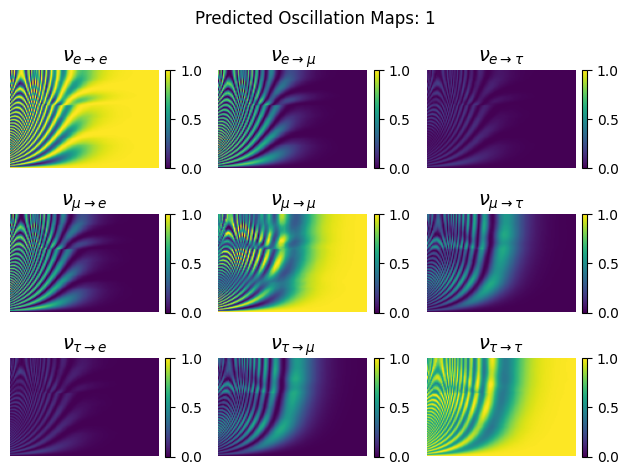

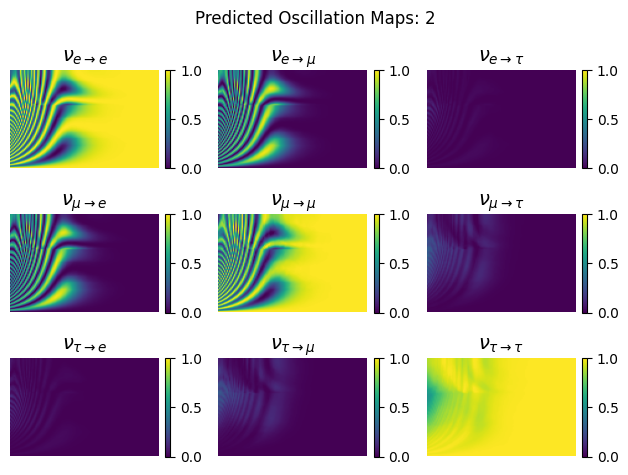

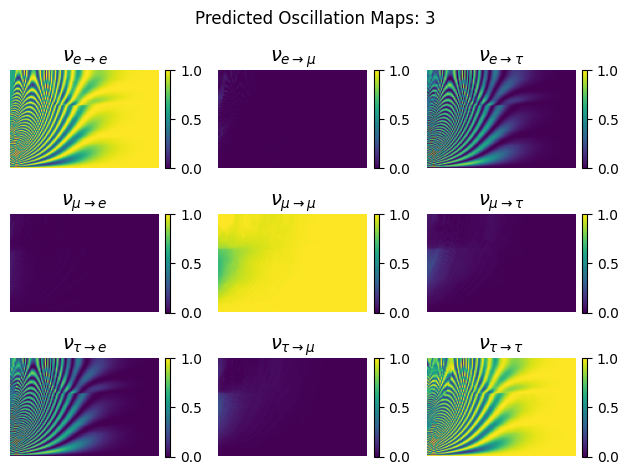

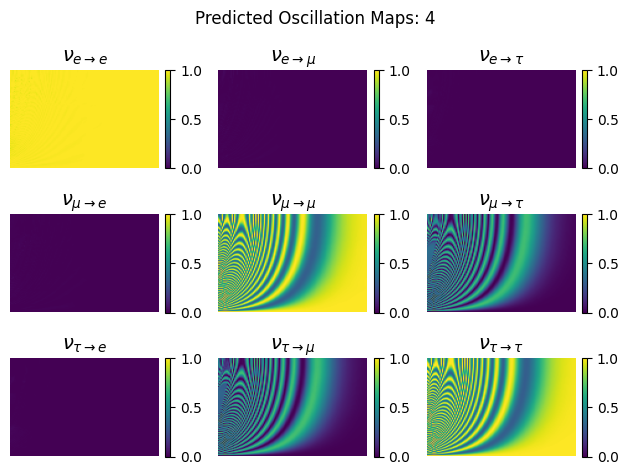

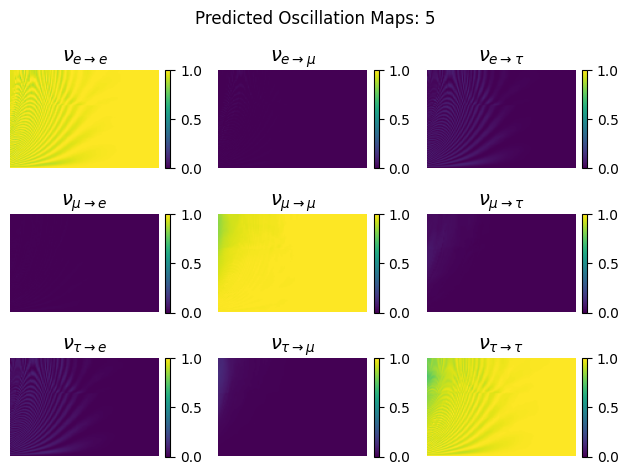

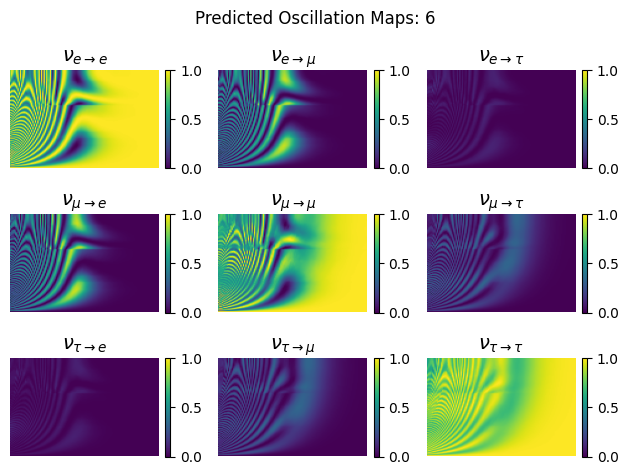

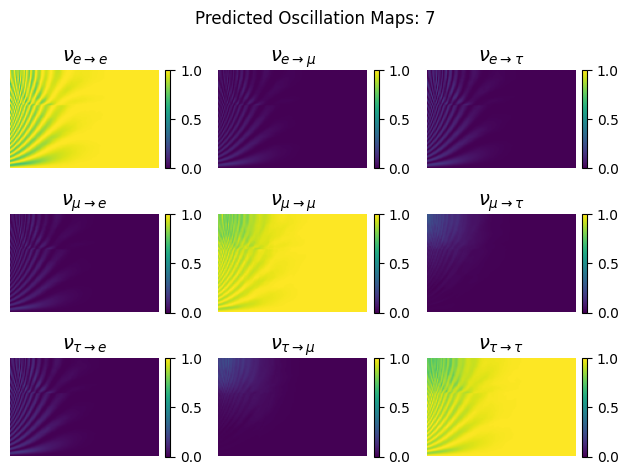

In [3]:
from OscillationMaps.utils import plot_osc_maps
for ii in range(maps_out.shape[0]):
    plot_osc_maps(maps_out[ii], title='Predicted Oscillation Maps: ' + str(ii + 1))

## Oscillation Maps in Vacuum

Finally, we can also simulate the oscillation maps in vacuum using the function `get_oscillation_maps_vacuum`.
Note that these maps are calculated analytically and, thus, don't need to use any trained model.

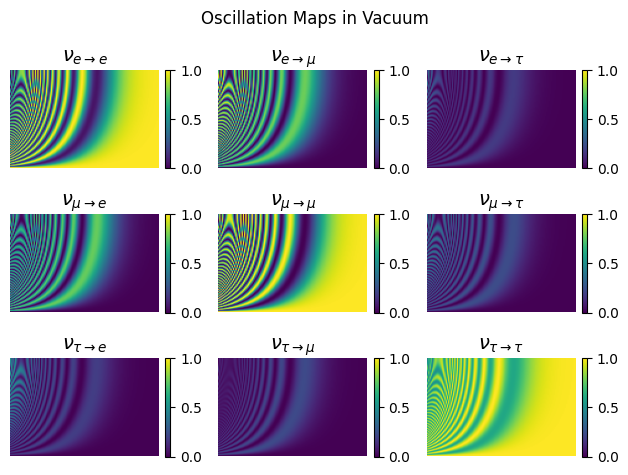

In [5]:
from OscillationMaps.VacuumMaps import get_oscillation_maps_vacuum

# Define parameters
osc_pars_in = [2.392e+02,  2.955e+02,  2.183e+02,  2.128e+02,  6.523e-05, -5.502e-03]
# Propagate
maps_out = get_oscillation_maps_vacuum(osc_pars=osc_pars_in)

plot_osc_maps(maps_out, title='Oscillation Maps in Vacuum')